## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





### SOLUTION

In [330]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [3]:
train = pd.read_csv('C:\\Users\\User\\Documents\\PDD - Data analytics\\Computing for data analytics\\Python\\train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Handling missing values:

1.	Validating null values

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

2. Verifying duplicated values in the dataset

In [32]:
train.duplicated().sum()

0

3. 	Replacing missing values

In [4]:
null_train = train.isnull().sum()
print(null_train[null_train > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


--> The columns with the missing values are LotFrontage, Electrical and GarageYrBlt. According to the data description, for the next columns, the NAs are part of the variables, they do not mean that the values are empty or missing, reason why we will modify the value by assigning a proper description:

In [77]:
train['Alley'] = train['Alley'].fillna('NoAlley')
train['MasVnrType'] = train['MasVnrType'].fillna('NoMasVnr')
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
train['BsmtQual'] = train['BsmtQual'].fillna('NoBasement')
train['BsmtCond'] = train['BsmtCond'].fillna('NoBasement')
train['BsmtExposure'] = train['BsmtExposure'].fillna('NoBasement')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('NoBasement')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('NoBasement')
train['FireplaceQu'] = train['FireplaceQu'].fillna('NoFireplace')
train['GarageType'] = train['GarageType'].fillna('NoGarage')
train['GarageYrBlt'] = train['GarageYrBlt'].fillna('NoGarage')
train['GarageFinish'] = train['GarageFinish'].fillna('NoGarage')
train['GarageQual'] = train['GarageQual'].fillna('NoGarage')
train['GarageCond'] = train['GarageCond'].fillna('NoGarage')
train['PoolQC'] = train['PoolQC'].fillna('NoPool')
train['Fence'] = train['Fence'].fillna('NoFence')
train['MiscFeature'] = train['MiscFeature'].fillna('NoMiscFeature')

- LotFrontage: This is a numerical variable reason we will verify the outlier to verify the most appropriate method to handle the missing values.

<AxesSubplot:xlabel='LotFrontage'>

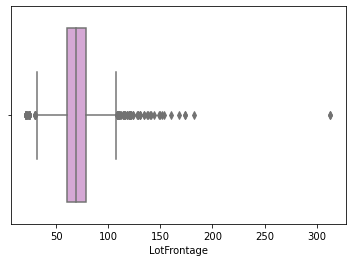

In [100]:
sns.boxplot(x = 'LotFrontage', data = train, color = 'plum')

For this variable, we will replace the missing values with the median due to the high number of outliers. Later, we will convert the variable to an integer because currently, it is a float.

In [6]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())

In [7]:
train['LotFrontage'] = train['LotFrontage'].astype(int)

- GarageYrBlt and Electrical: These are categorical variables, therefore, we will calculate the mode to replace the missing values. Additionally, for GarageYrBlt, we will convert the variable to integers with the purpose to delete the decimal from each value.

In [78]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [8]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0])

In [9]:
train['GarageYrBlt'] = train['GarageYrBlt'].astype(int)

In [79]:
null_train = train.isnull().sum()
print(null_train[null_train > 0])

Series([], dtype: int64)


Now, we have our data clean!

### Outliers detection and treatment

Now, we will verify the existents outliers in the complete dataset through the boxplot graph:

<AxesSubplot:>

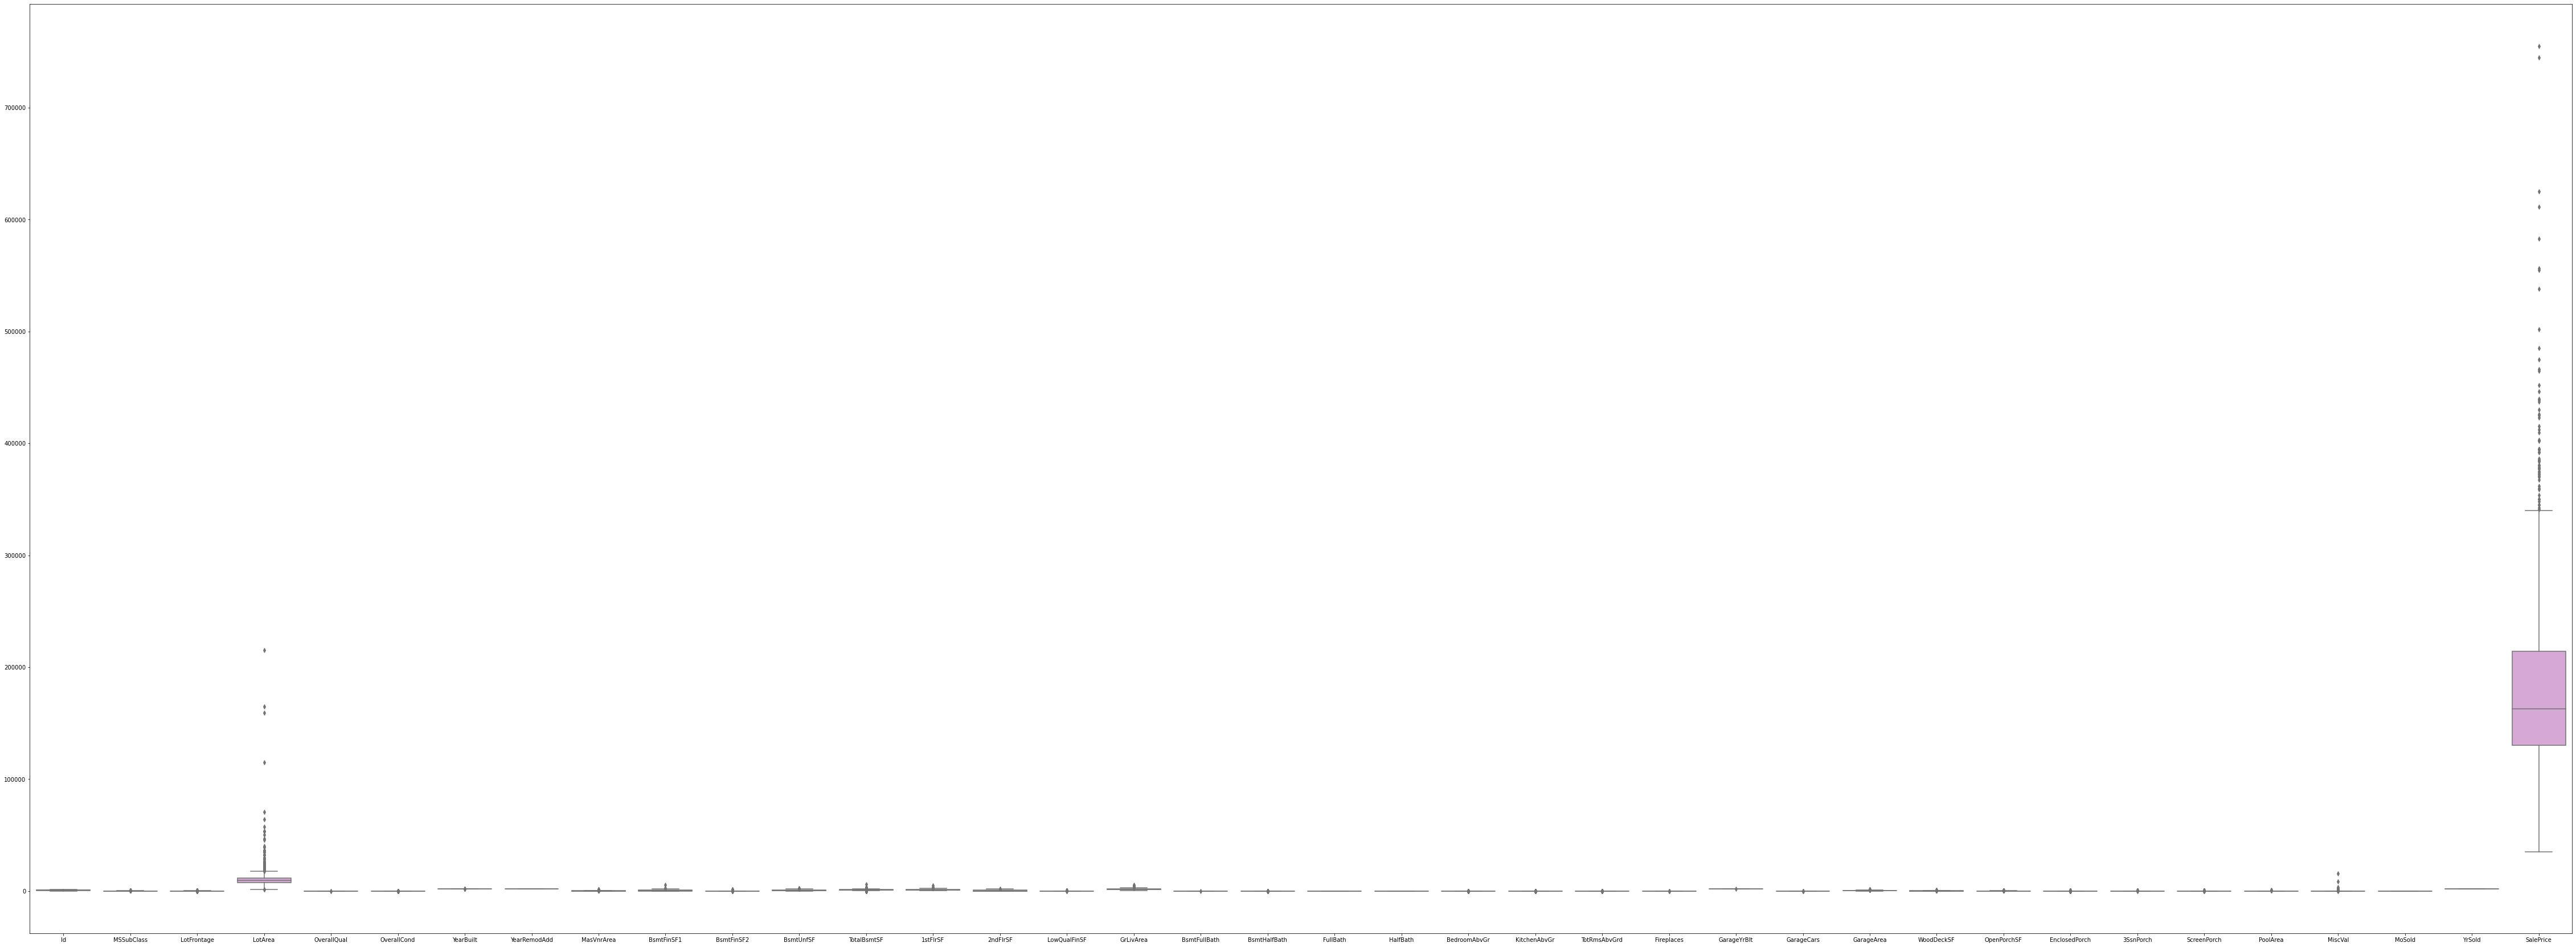

In [331]:
plt.figure(figsize = (80, 30))
sns.boxplot(data = train, color = 'plum')

There are 3 columns with significant outliers: SalePrice, LotArea and MiscVal

<AxesSubplot:xlabel='SalePrice'>

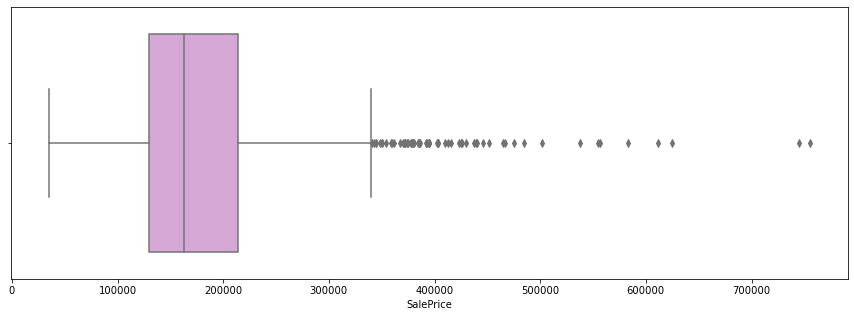

In [105]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = 'SalePrice', data = train, color = 'plum')

<AxesSubplot:xlabel='LotArea'>

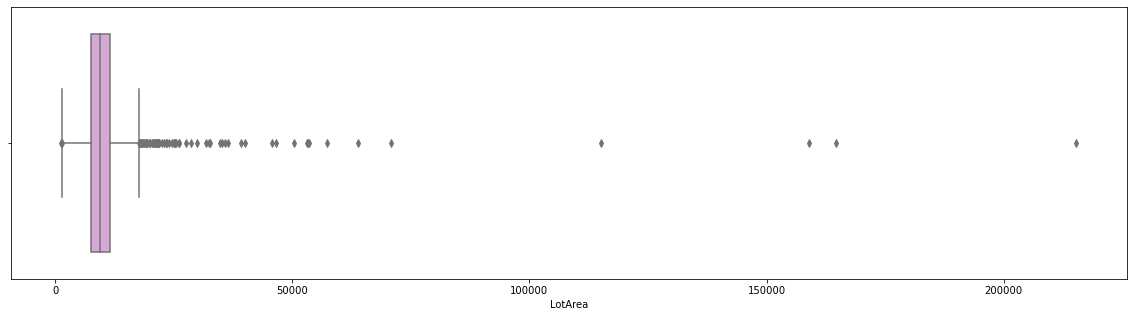

In [107]:
plt.figure(figsize = (20, 5))
sns.boxplot(x = 'LotArea', data = train, color = 'plum')

<AxesSubplot:xlabel='MiscVal'>

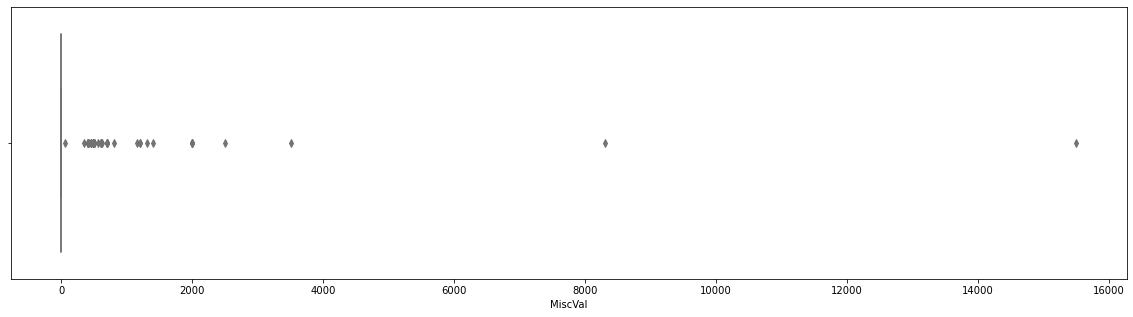

In [108]:
plt.figure(figsize = (20, 5))
sns.boxplot(x = 'MiscVal', data = train, color = 'plum')

#### ---> Outliers Treatment: 
I consider that these outliers are not result of data entry errors, reason why I will keep them in the Data Analysis.

### Numerical variables:

To observe the frequency of each numerical variable in the dataset, we will create a function to plot the variables and generate the first outputs:

In [1]:
def freq_num(variables):
    plt.figure(figsize = (10,4))
    plt.hist(train[variables], bins = 50)
    plt.xlabel(variables)
    plt.ylabel("Frequency")
    plt.title("{} Distribution".format(variables))
    plt.show()

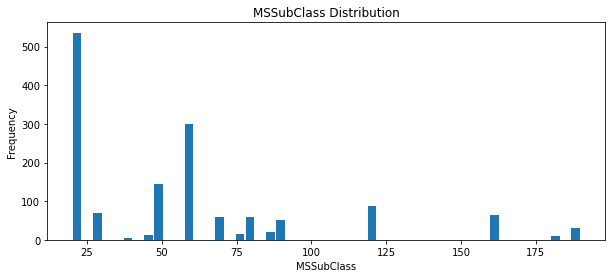

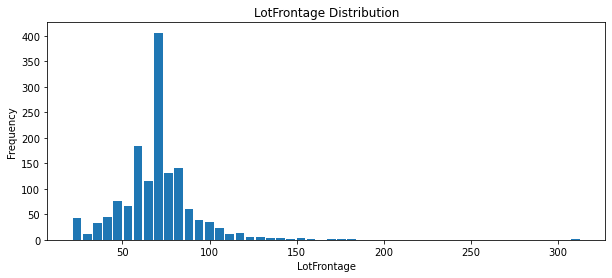

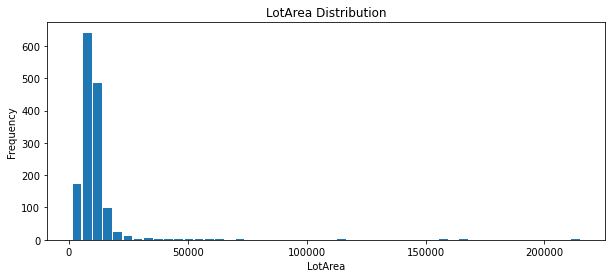

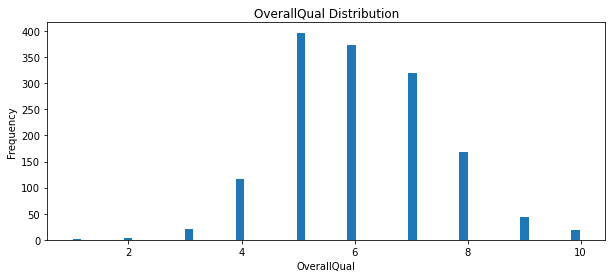

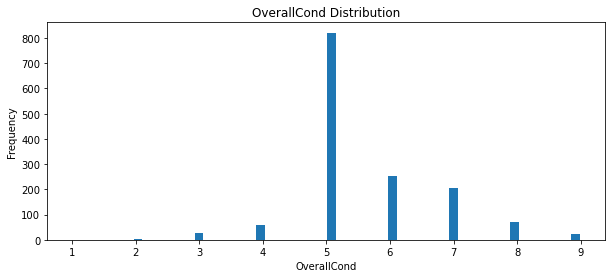

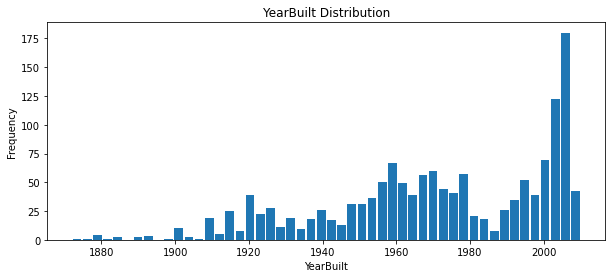

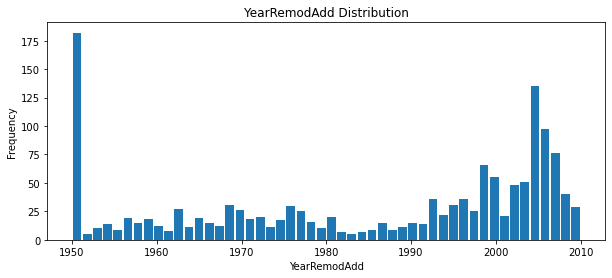

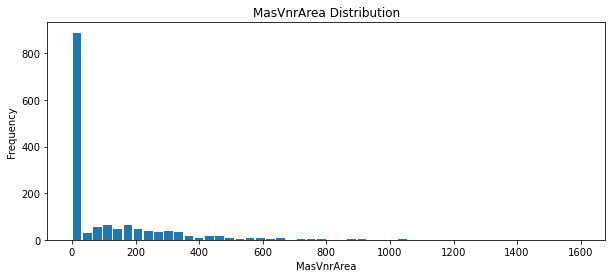

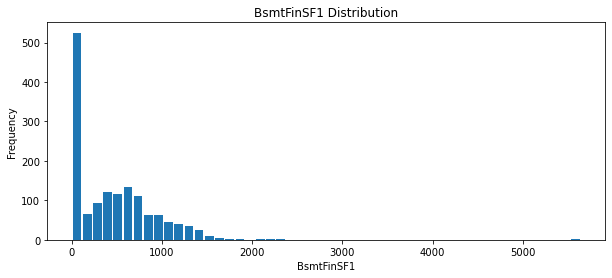

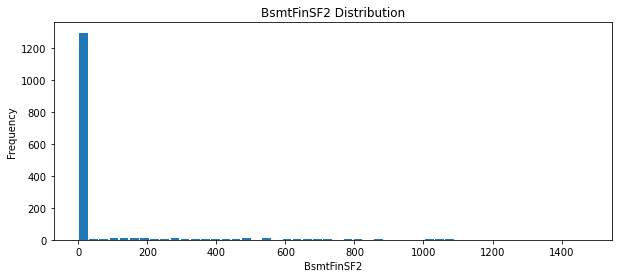

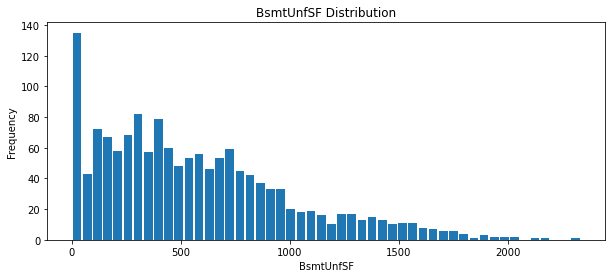

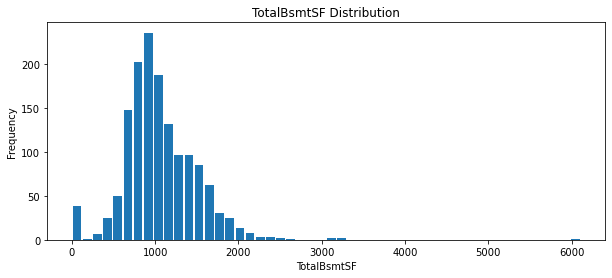

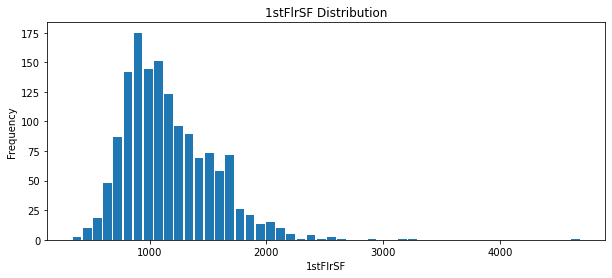

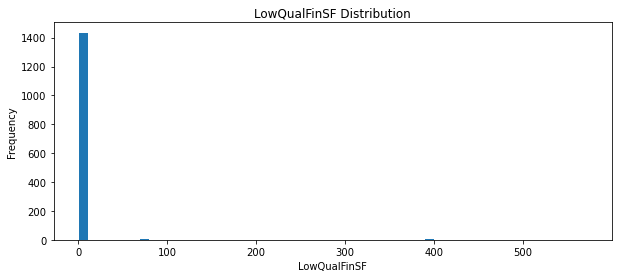

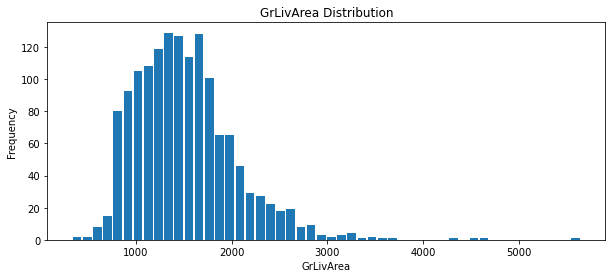

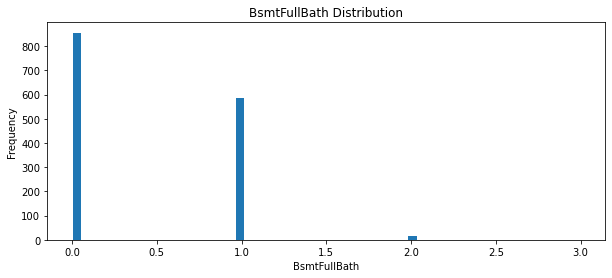

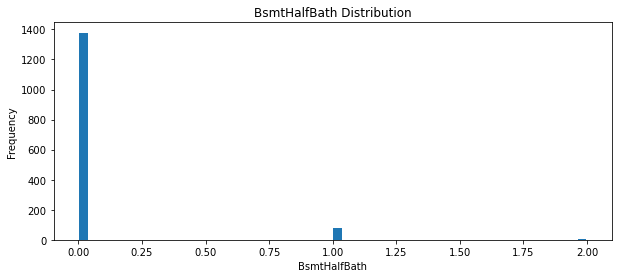

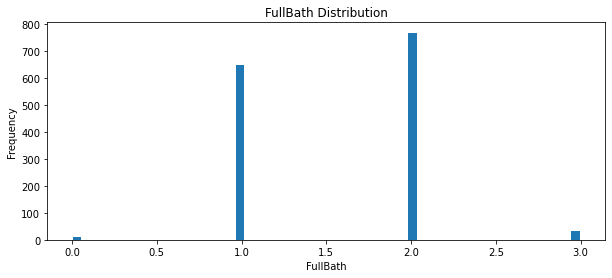

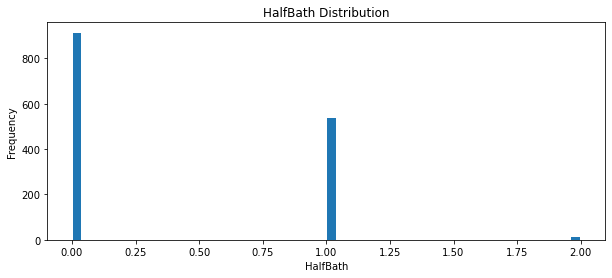

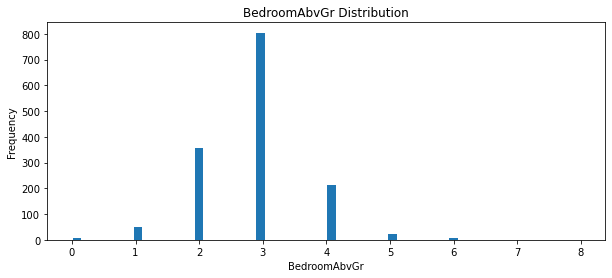

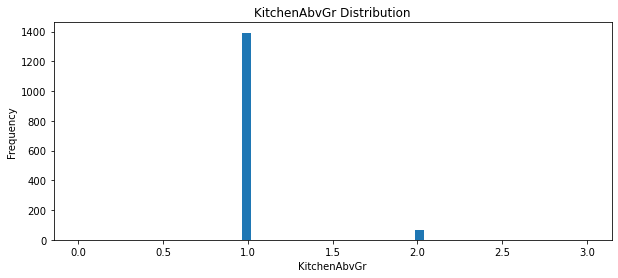

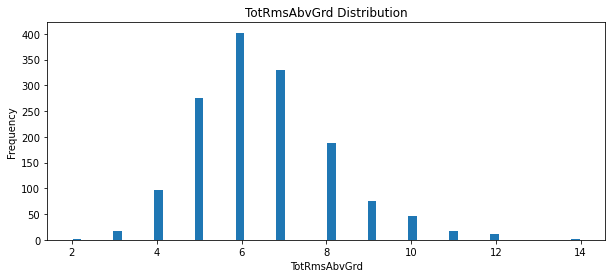

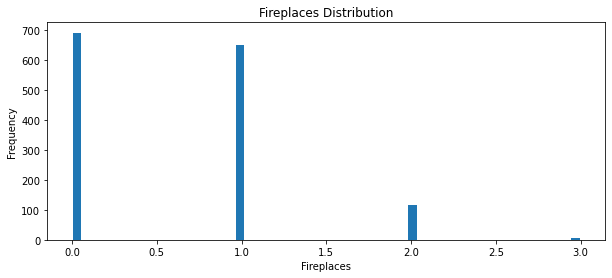

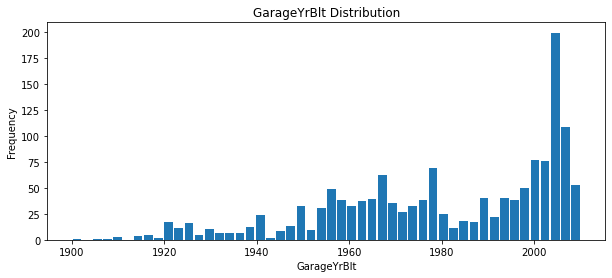

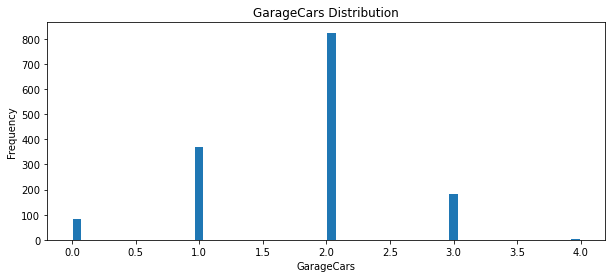

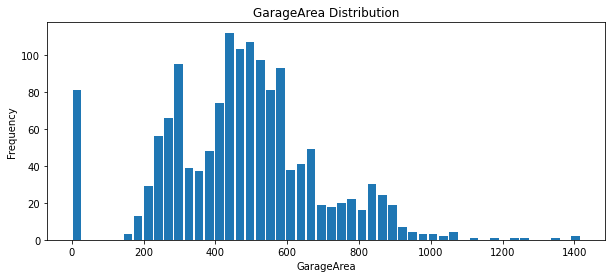

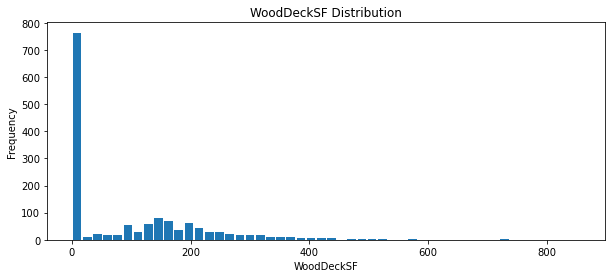

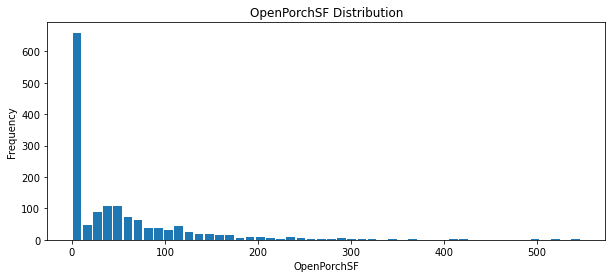

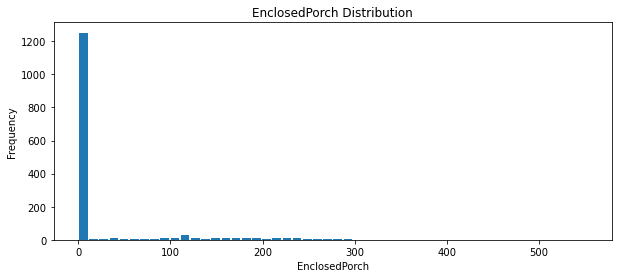

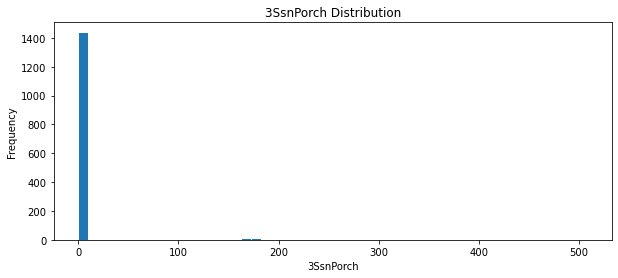

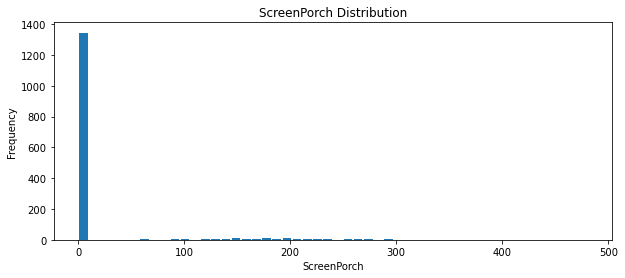

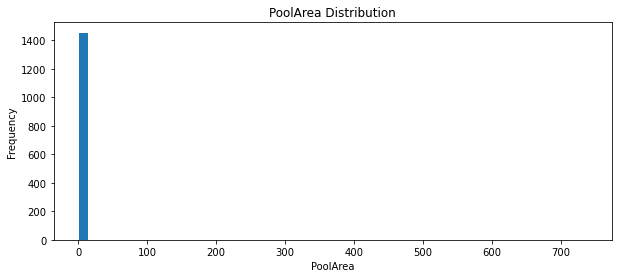

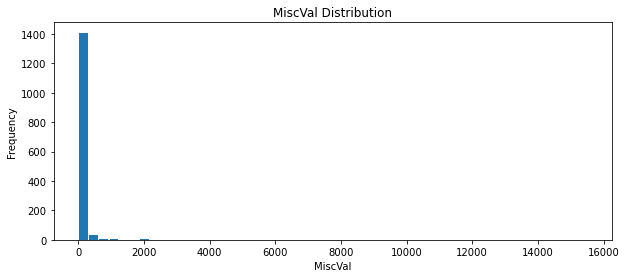

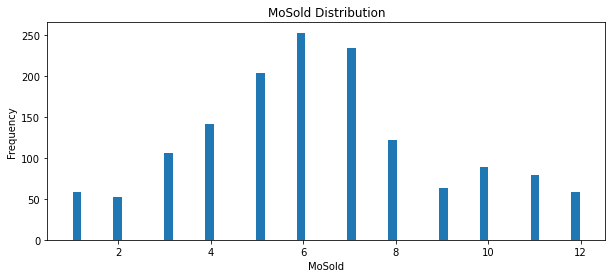

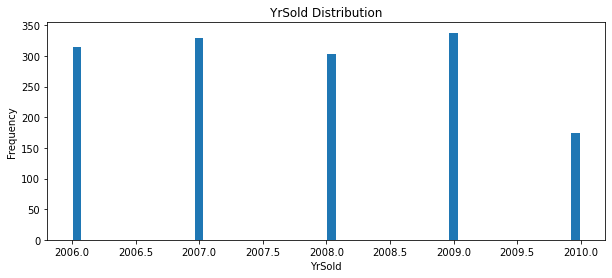

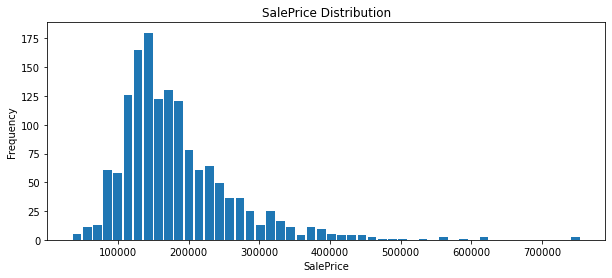

In [344]:
NumVar = ['MSSubClass', 'LotFrontage','LotArea', 'OverallQual','OverallCond', 'YearBuilt','YearRemodAdd','MasVnrArea',
'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','LowQualFinSF','GrLivArea', 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']
for x in NumVar:
    freq_obs(x)

Verifying the correlation between the numerical variables:

<AxesSubplot:>

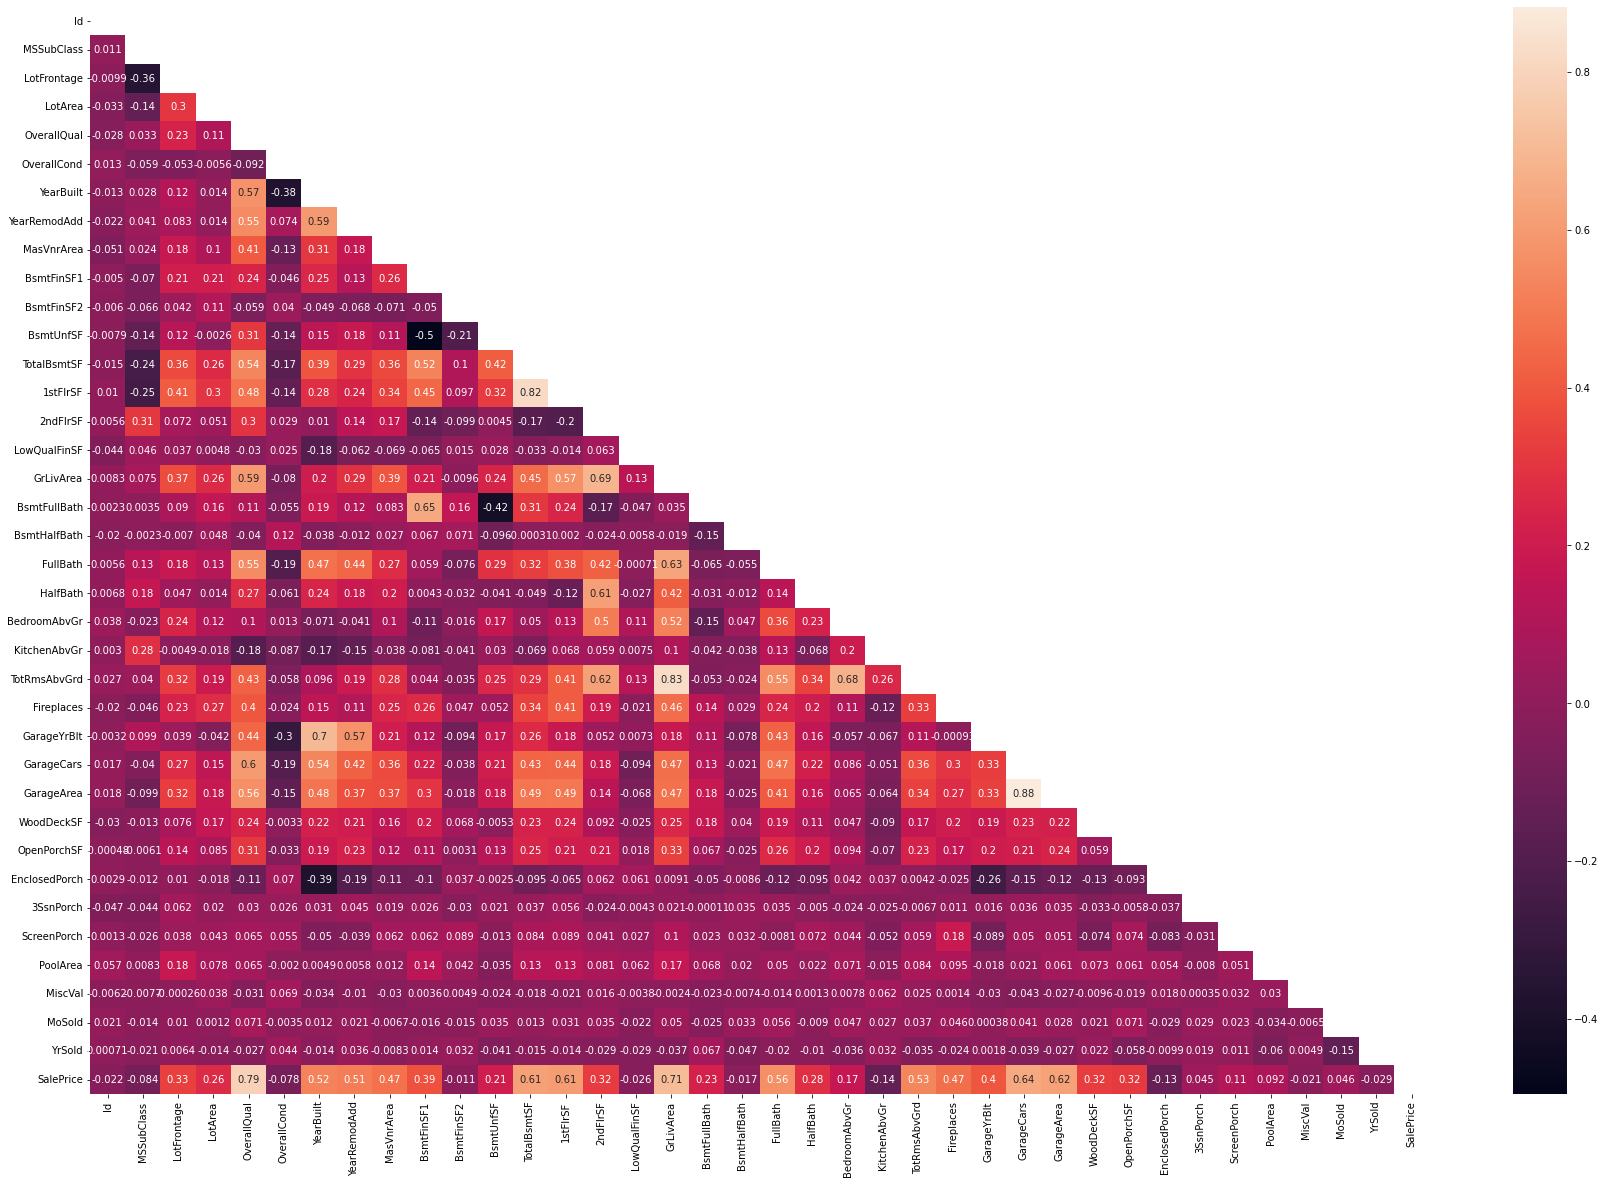

In [177]:
train_corr = train.corr()
matrix = np.triu(train_corr)
plt.figure(figsize = (30, 20))
sns.heatmap(train_corr, annot = True, mask = matrix)

According to the heatmap, we could say that the variables with correlation moderate to high (<=-0.7 or >= 0.7) are:

- GarageArea and GarageCars: 0.88
- TotRmsAbvGrd and GrLivArea: 0.83
- 1stFlrSF and TotalBsmtSF: 0.82

To provide relevant insights, we are going to analyze the top 4 correlations above 60% between the Sales Price variable and the other database variables:

- SalePrice and OverallQual: 0.79
- SalePrice and GrLivArea: 0.71
- SalePrice and GarageCars:0.64
- SalePrice and TotalBsmtSF: 0.61

Comment: we already know that GarageArea and GarageCars are strongly related as well as 1stFlrSF and TotalBsmtSF so we could calculate just the relationship between SalesPrice and GarageCars and SalePrice and TotalBsmtSF, the same results will apply to GarageArea and 1stFlrSF respectively.

->> SalePrice and OverallQual:

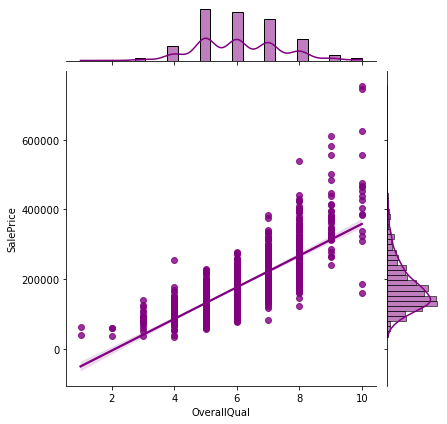

In [154]:
sns.jointplot(x = 'OverallQual',y = 'SalePrice', data = train, kind = 'reg', color = 'purple')

In [150]:
x1 = train['OverallQual'].values.reshape(-1, 1)
y1 = train['SalePrice'].values.reshape(-1, 1)

In [151]:
qual_model = LinearRegression()
qual_model.fit(x1, y1)
qual_model = LinearRegression().fit(x1, y1)
CoD = qual_model.score(x1, y1)
print(f"coefficient of determination: {CoD}")
print(f"intercept: {qual_model.intercept_}")
print(f"slope: {qual_model.coef_}")

coefficient of determination: 0.625651892462118
intercept: [-96206.07951476]
slope: [[45435.8025931]]


->> SalePrice and GrLivArea:

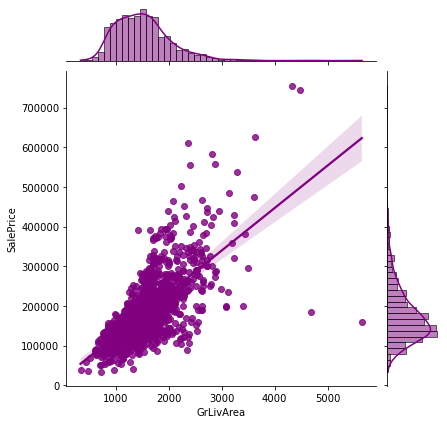

In [148]:
sns.jointplot(x = 'GrLivArea',y = 'SalePrice', data = train, kind = 'reg', color = 'purple')

In [168]:
x2 = train['GrLivArea'].values.reshape(-1, 1)

In [169]:
qual_model = LinearRegression()
qual_model.fit(x2, y1)
qual_model = LinearRegression().fit(x2, y1)
CoD = qual_model.score(x2, y1)
print(f"coefficient of determination: {CoD}")
print(f"intercept: {qual_model.intercept_}")
print(f"slope: {qual_model.coef_}")

coefficient of determination: 0.5021486502718042
intercept: [18569.02585649]
slope: [[107.13035897]]


->> SalePrice and GarageCars:

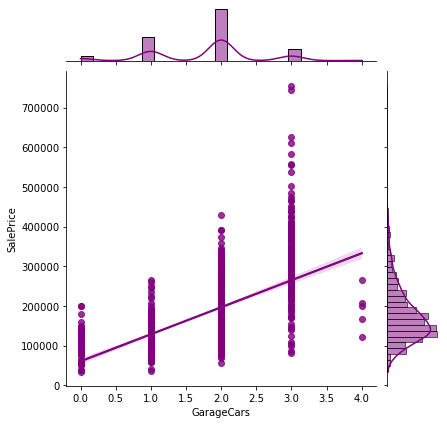

In [163]:
sns.jointplot(x = 'GarageCars',y = 'SalePrice', data = train, kind = 'reg', color = 'purple')

In [170]:
x3 = train['GarageCars'].values.reshape(-1, 1)

In [171]:
qual_model = LinearRegression()
qual_model.fit(x3, y1)
qual_model = LinearRegression().fit(x3, y1)
CoD = qual_model.score(x3, y1)
print(f"coefficient of determination: {CoD}")
print(f"intercept: {qual_model.intercept_}")
print(f"slope: {qual_model.coef_}")

coefficient of determination: 0.41012393993308693
intercept: [60618.98087152]
slope: [[68077.99764635]]


->> SalePrice and TotalBsmtSF:

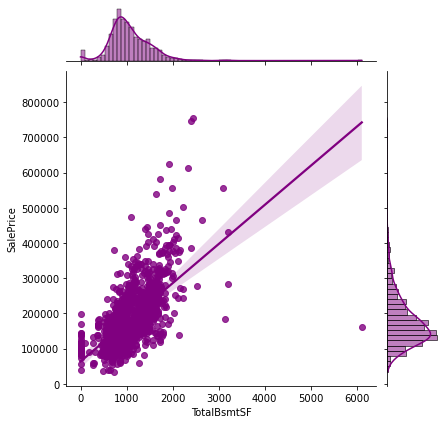

In [159]:
sns.jointplot(x = 'TotalBsmtSF',y = 'SalePrice', data = train, kind = 'reg', color = 'purple')

In [174]:
x4 = train['TotalBsmtSF'].values.reshape(-1, 1)

In [175]:
qual_model = LinearRegression()
qual_model.fit(x4, y1)
qual_model = LinearRegression().fit(x4, y1)
CoD = qual_model.score(x4, y1)
print(f"coefficient of determination: {CoD}")
print(f"intercept: {qual_model.intercept_}")
print(f"slope: {qual_model.coef_}")

coefficient of determination: 0.37648109325168655
intercept: [63430.62854551]
slope: [[111.10960369]]


### Categorical variables:

In this case, we will observe the frequency of each categorical variable in the dataset, as well as we did for the numercial ones:

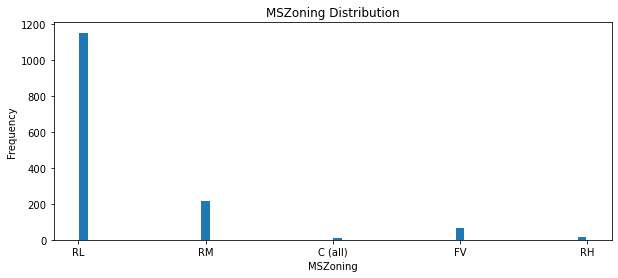

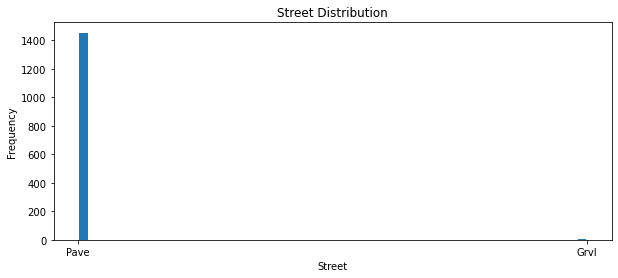

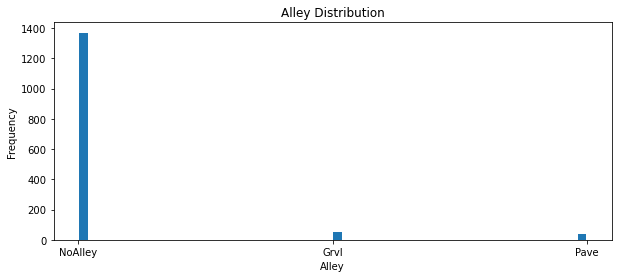

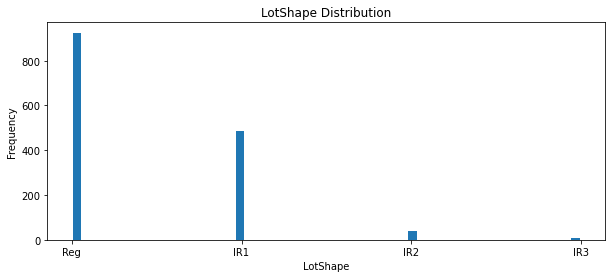

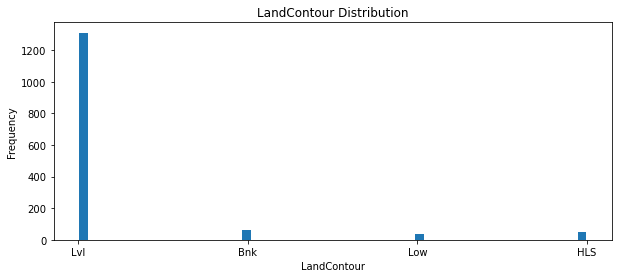

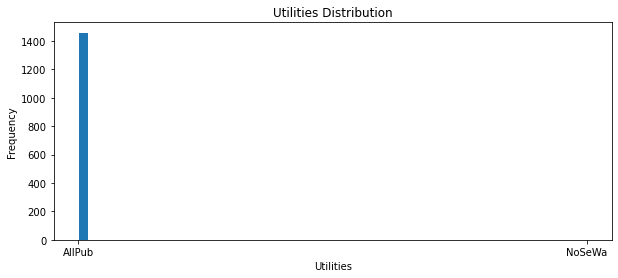

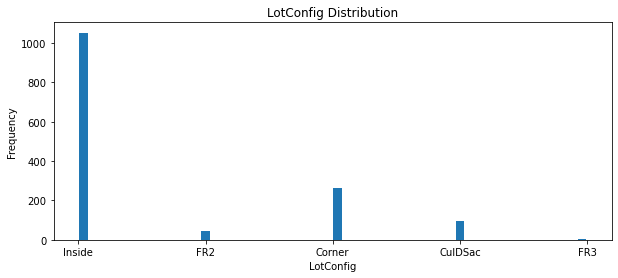

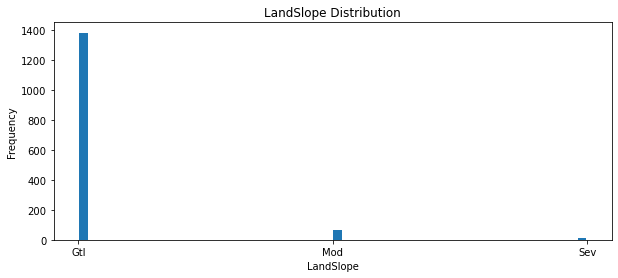

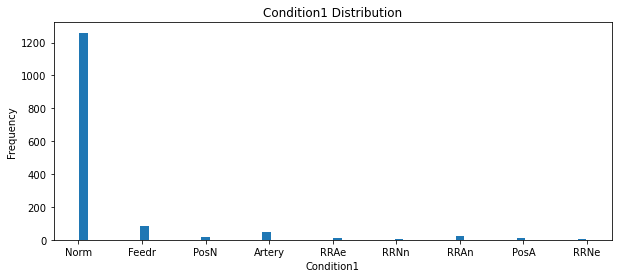

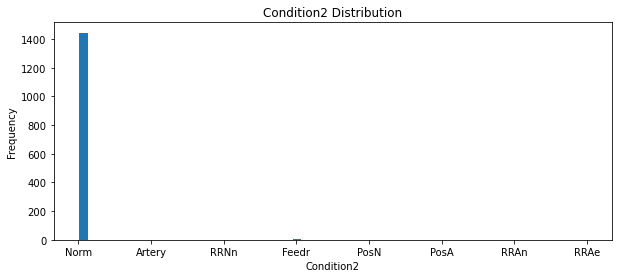

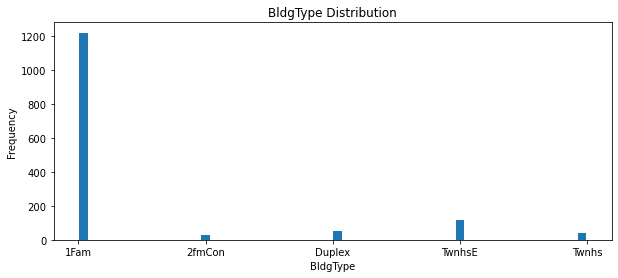

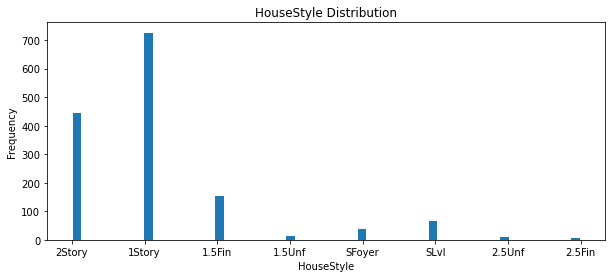

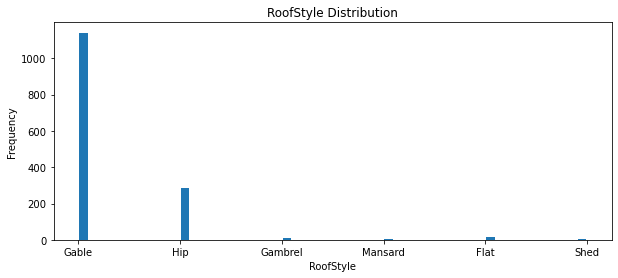

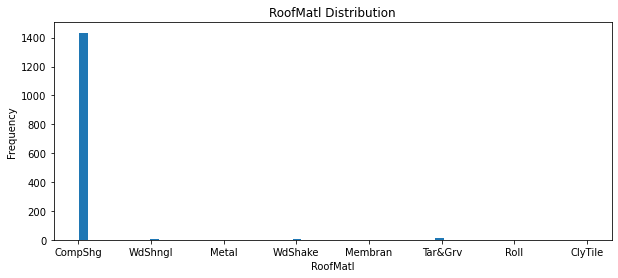

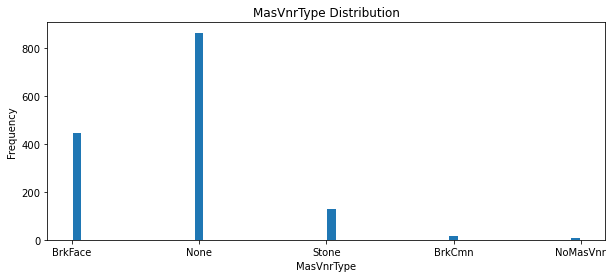

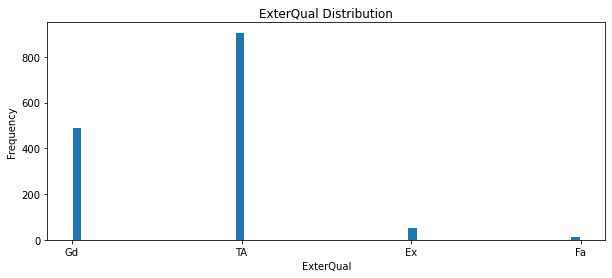

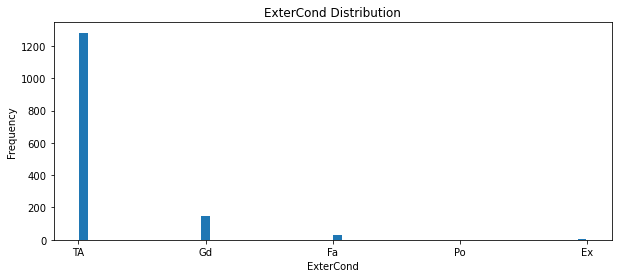

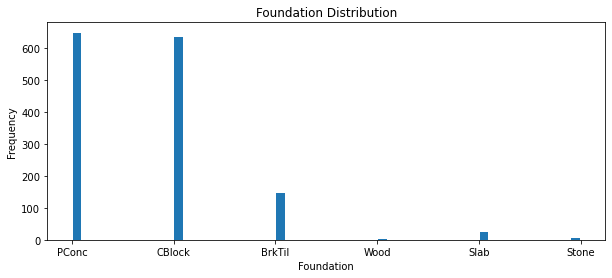

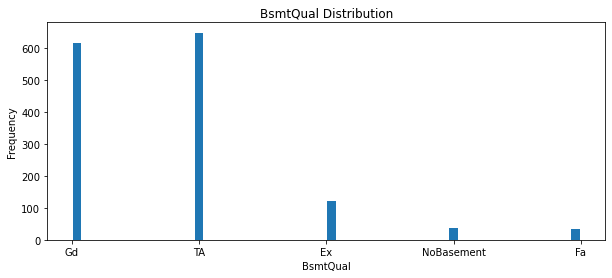

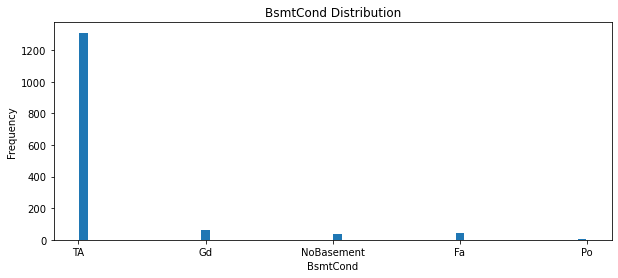

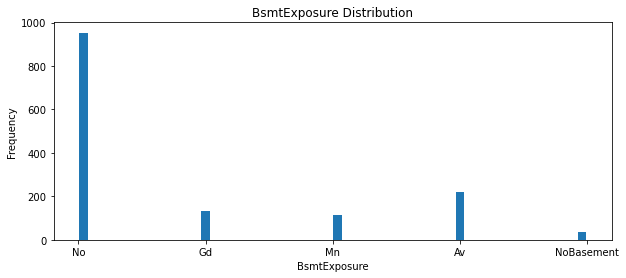

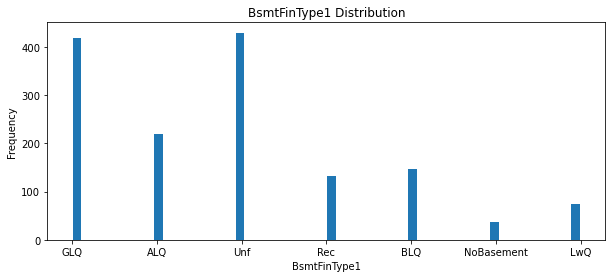

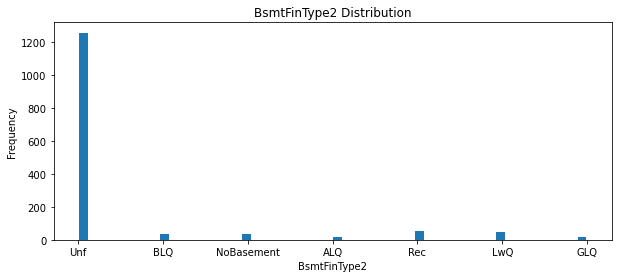

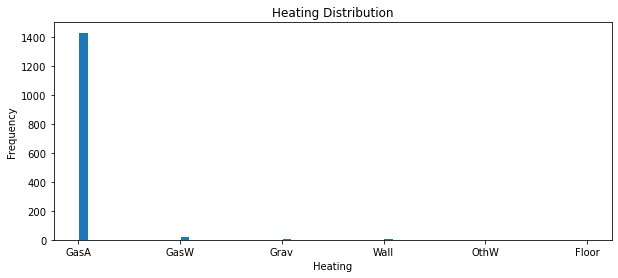

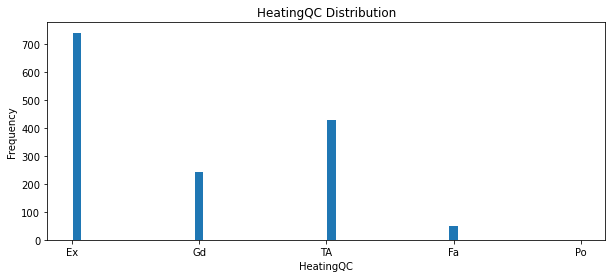

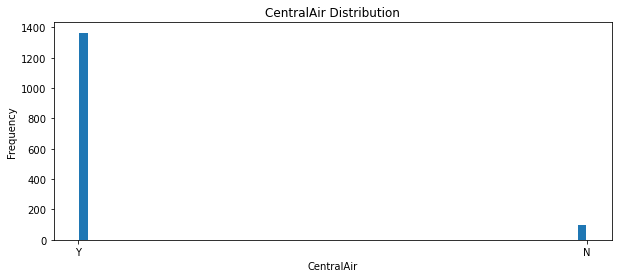

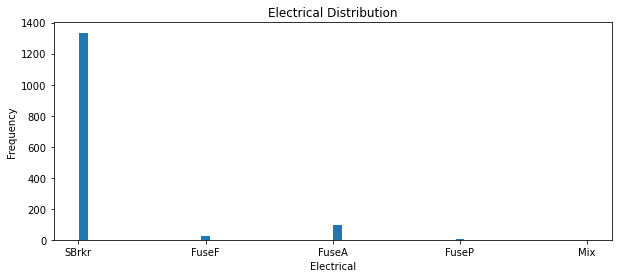

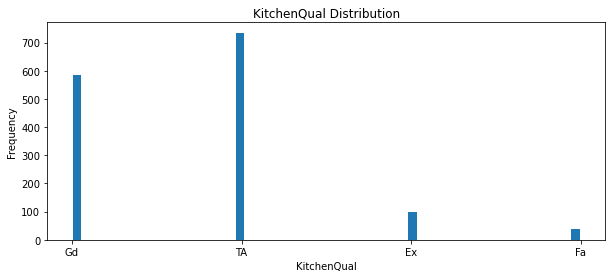

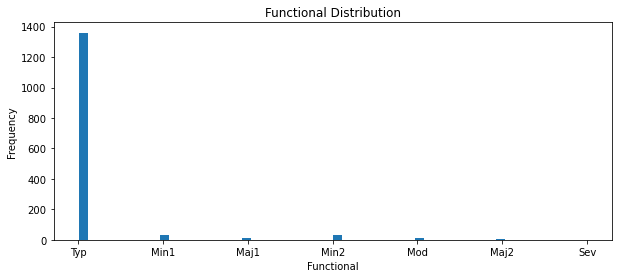

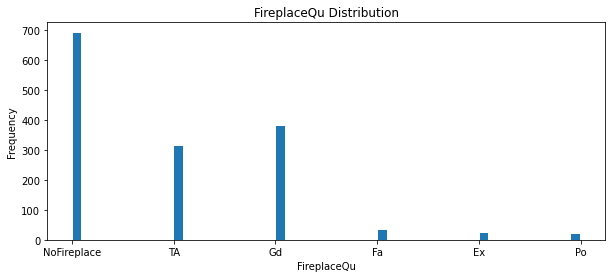

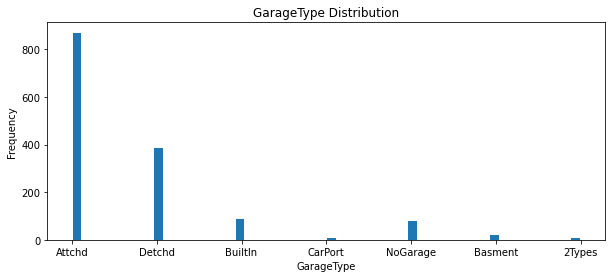

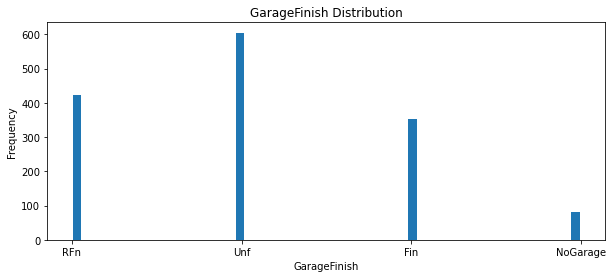

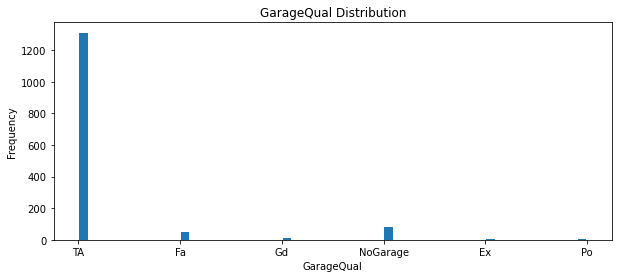

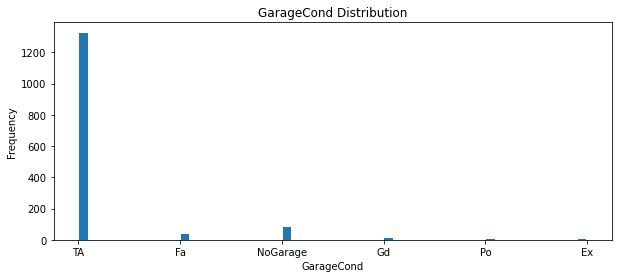

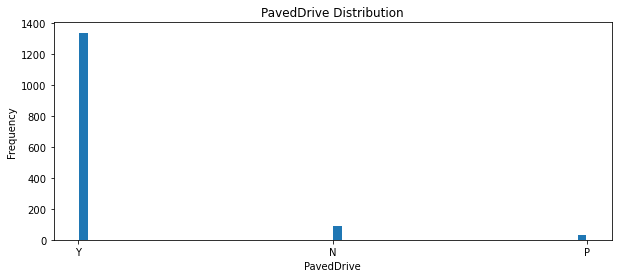

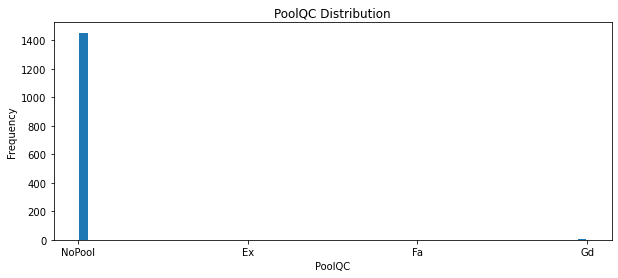

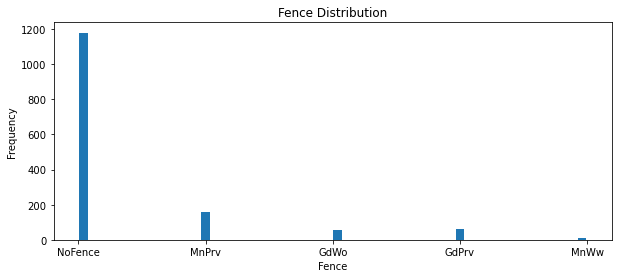

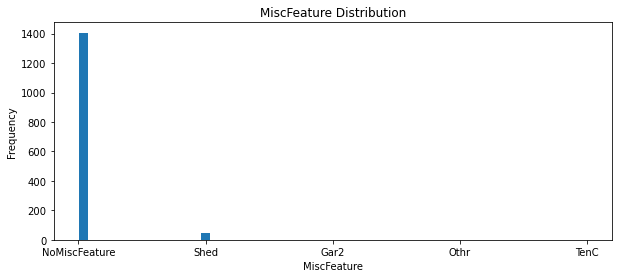

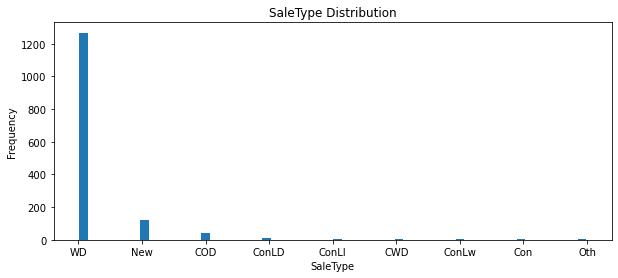

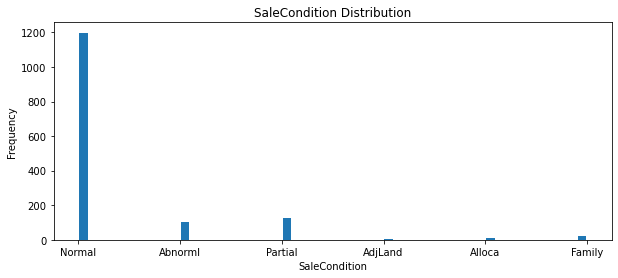

In [229]:
CatVar = ['MSZoning', 'Street', 'Alley','LotShape', 'LandContour','Utilities','LotConfig',
'LandSlope','Condition1','Condition2','BldgType','HouseStyle','RoofStyle', 'RoofMatl','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
for i in CatVar:
    freq_obs(i)

In [353]:
def freq_cat2(variables_cat2):
    plt.figure(figsize = (20,3))
    plt.hist(train[variables_cat2], edgecolor = 'black', rwidth=.5)
    plt.xlabel(variables_cat2)
    plt.ylabel("Frequency")
    plt.title("{} Distribution".format(variables_cat2))
    plt.show()

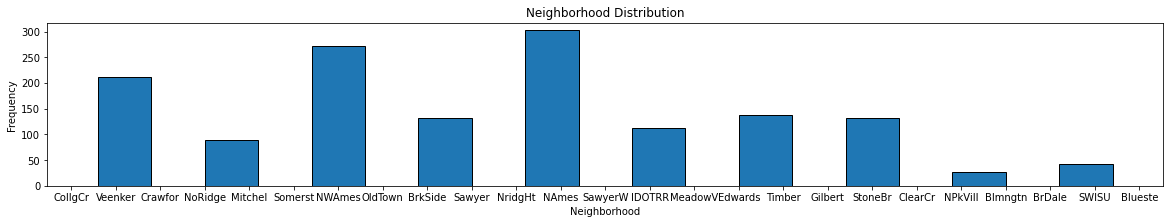

In [356]:
CatVar2 = ['Neighborhood']
for i in CatVar2:
    freq_cat2(i)

### CONCLUSION

Through the bat plots we determined that the next categorical variables are going to be analyzed because of the frequency of their level, the other ones are pretty plane:

- HouseStyle
- ExterQual
- BsmtQual
- KitchenQual
- GarageType
- Neighborhood

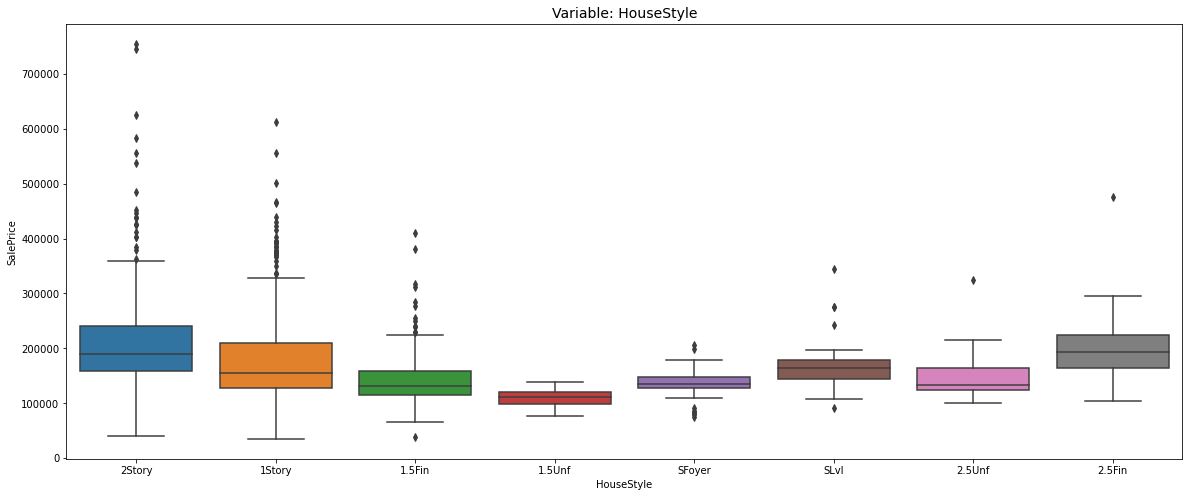

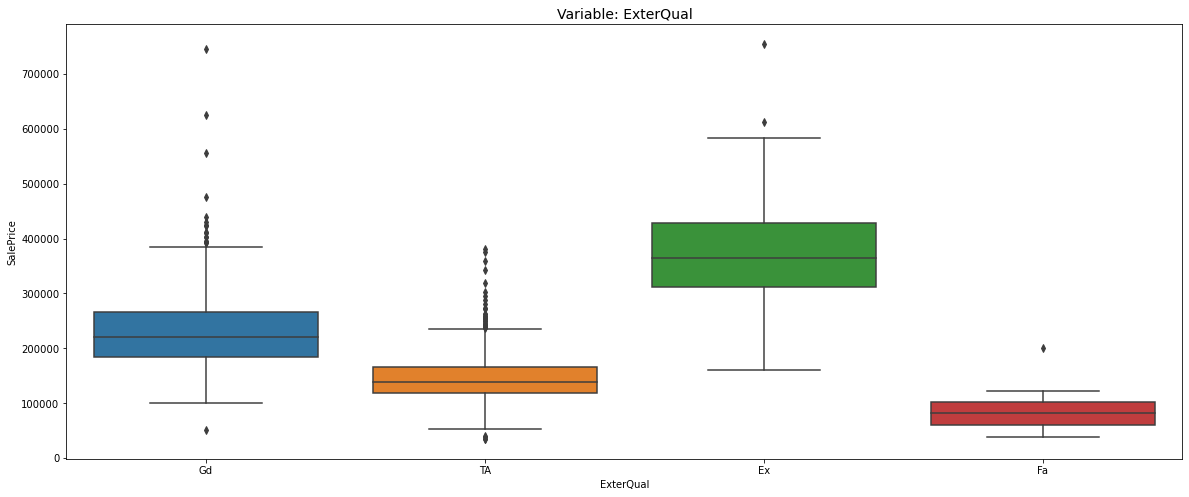

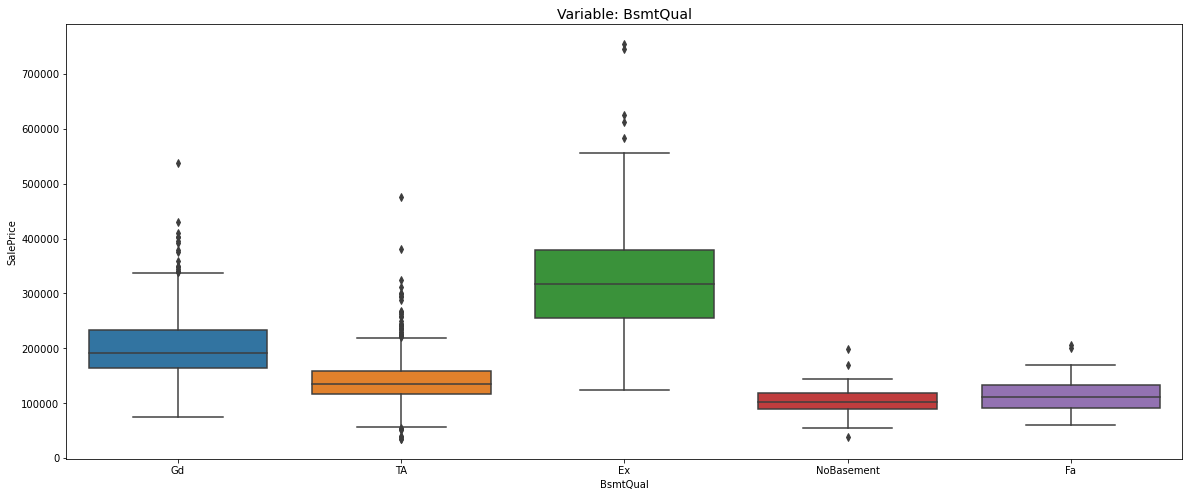

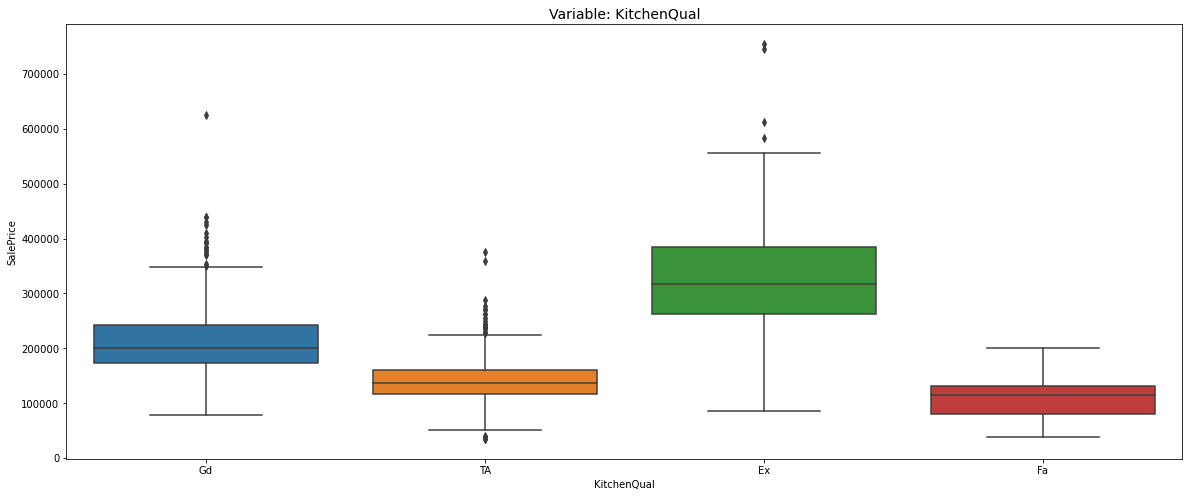

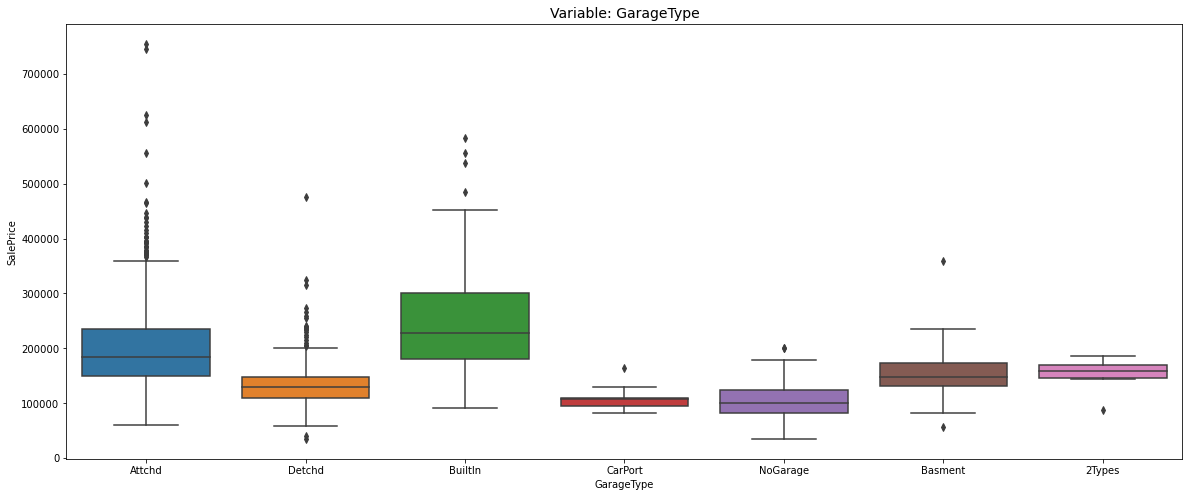

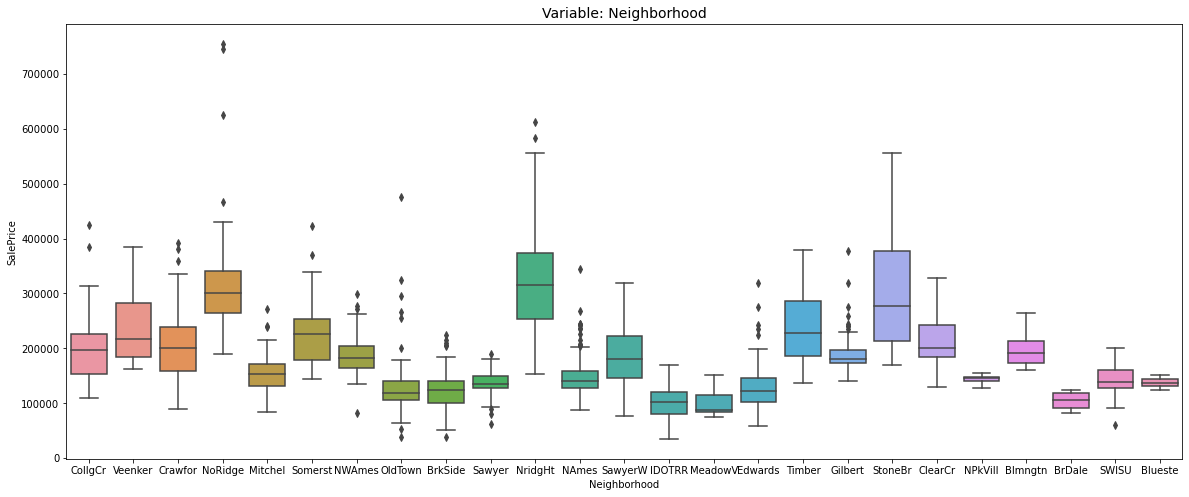

In [360]:
categorical_list = ['HouseStyle', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageType', 'Neighborhood']
price = ['SalePrice']

for x in categorical_list:
    plt.subplots(figsize=(20, 8))
    plt.title(f'Variable: {x}', fontsize=14)
    sns.boxplot(x=x, y='SalePrice', data=train)